# Old Faithful Geyser

Here we will try using a *k*-means clustering on the Old Faithful geyser data. The data set is provided [here](http://www.stat.cmu.edu/~larry/all-of-statistics/=data/faithful.dat).

![Old Faithful Geyser](wyoming-old-faithful.jpg "Old Faithful Geyser")
<div style="text-align: center;">
Credit: http://www.destination360.com/north-america/us/wyoming/yellowstone-national-park/old-faithful
</div>

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd

In [2]:
geyser = pd.read_csv('old-faithful-geyser.csv')

In [3]:
geyser.head()

,eruptions,waiting
0,3.600,79
1,1.800,54
2,3.333,74
3,2.283,62
4,4.533,85


Try plotting the data.

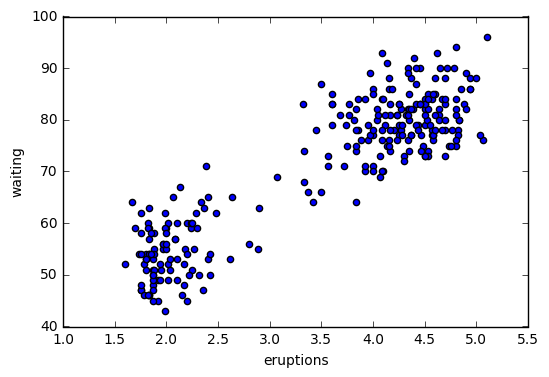

In [4]:
geyser.plot.scatter(x='eruptions', y='waiting')

In [5]:
import seaborn as sns

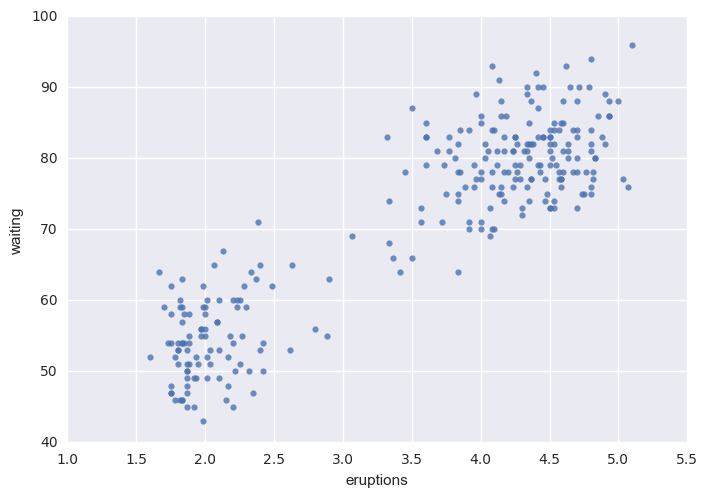

In [6]:
sns.regplot(data=geyser, x='eruptions', y='waiting', fit_reg=False)

From the plot, we can see that the data can be divided into 2 main groups. Therefore, we will try using `k = 2` for our *k*-means model.

In [8]:
# import
from sklearn import cluster

# instantiate
k = 2
kmeans = cluster.KMeans(n_clusters=k)

# fit
kmeans.fit(geyser)

#titanic was panda dataframe; this here is numpai ? 

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=2, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)

After we model the data, we can get the centroid of each cluster as follows:

In [10]:
centroids = kmeans.cluster_centers_
print(centroids)

[[  2.09433     54.75      ]
 [  4.29793023  80.28488372]]


From our *k*-means model we just built, we can see the labels to which each data point is assigned.

In [12]:
# predict

labels = kmeans.predict(geyser)
print(labels)

#when clustering, always label the old set of data first

[1 0 1 0 1 0 1 1 0 1 0 1 1 0 1 0 0 1 0 1 0 0 1 1 1 1 0 1 1 1 1 1 0 1 1 0 0
 1 0 1 1 0 1 0 1 1 0 0 1 0 1 1 0 1 0 1 1 0 1 1 0 1 0 1 0 1 1 1 0 1 1 0 1 1
 0 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 0 1 0 1 0 1 1 1 0 1 0 1 0 1 1 0 1 0 1 1 1
 0 1 1 0 1 0 1 0 1 0 1 1 0 1 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 1 0 1 1 1 0 1 0
 1 0 1 1 0 1 1 1 1 1 0 1 0 1 0 1 0 1 0 1 0 1 0 0 1 1 1 1 1 0 1 1 0 1 1 1 0
 1 1 0 1 0 1 0 1 1 1 1 1 1 0 1 0 1 1 0 1 0 1 1 0 1 1 1 0 1 0 1 0 1 0 1 0 1
 0 1 1 1 1 1 1 1 1 0 1 0 1 0 0 1 1 0 1 0 1 0 1 1 0 1 0 1 0 1 1 1 1 1 1 1 0
 1 1 1 0 1 0 0 1 1 0 1 0 1]


Later on, we can visualize the data based on the label information we have.

In [13]:
geyser['labels'] = labels

In [14]:
geyser.head()

,eruptions,waiting,labels
0,3.600,79,1
1,1.800,54,0
2,3.333,74,1
3,2.283,62,0
4,4.533,85,1


In [20]:
geyser[geyser['labels'] == 0]

,eruptions,waiting,labels
1,1.800,54,0
3,2.283,62,0
5,2.883,55,0
8,1.950,51,0
10,1.833,54,0
13,1.750,47,0
15,2.167,52,0
16,1.750,62,0
18,1.600,52,0
20,1.800,51,0


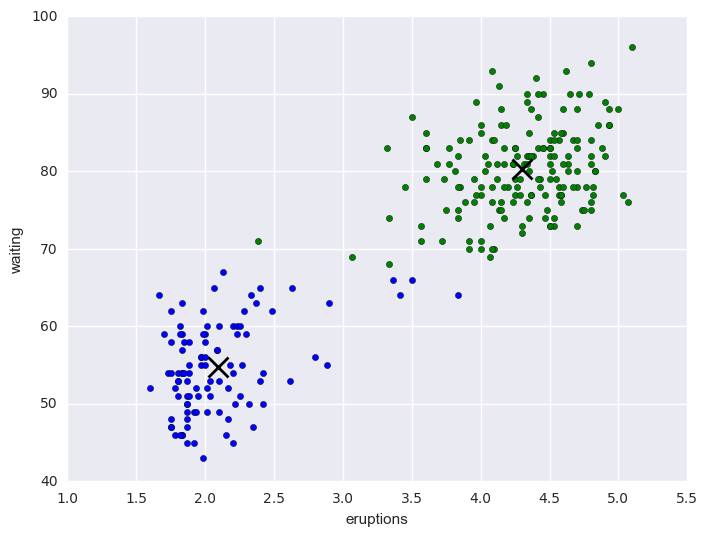

In [15]:
f, ax = plt.subplots(1, 1, figsize=(8, 6))
color = ['blue', 'green']
for each in range(k):
    selected_data = geyser[geyser['labels'] == each]
    selected_data.plot.scatter(x='eruptions', y='waiting', ax=ax, color=color[each])
    lines = plt.plot(centroids[each, 0], centroids[each, 1], 'kx')
    plt.setp(lines, markersize=15.0, markeredgewidth=2.0)
    
# this is ploting - needs knowledge on lines / colours

In [29]:
df = {
    'data': [2, 3, 4, 10, 12, 20, 30, 11, 25]
}
df = pd.DataFrame(data)
df

NameError: name 'data' is not defined

In [26]:
kmeans = cluster.KMeans[n_cluster=2]
kmeans.fit(df)
labels = kmeans.predict(df)
df['cluster'] = labels
df.head()

SyntaxError: invalid syntax (<ipython-input-26-79bb8b57858d>, line 1)

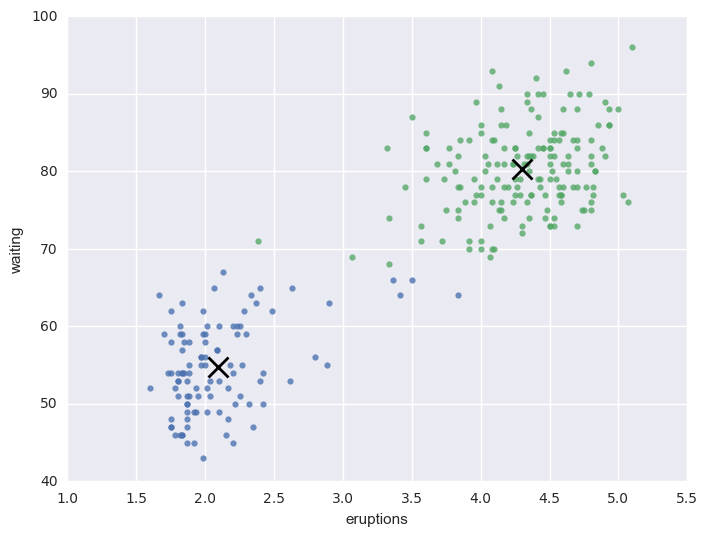

In [16]:
f, ax = plt.subplots(1, 1, figsize=(8, 6))
for each in range(k):
    selected_data = geyser[geyser['labels'] == each]
    sns.regplot(data=selected_data, x='eruptions', y='waiting', fit_reg=False)
    lines = plt.plot(centroids[each, 0], centroids[each, 1], 'kx')
    plt.setp(lines, markersize=15.0, markeredgewidth=2.0)

In [ ]:
kmeans.cluster_centers_